In [179]:
class Particle:
    #creates a new particle for the system (stars in this case)
    def __init__(self, mass, posx, posy, vx=0, vy=0):
        self.m = mass

        #x and y coordinates
        self.x = posx
        self.y = posy

        #x and y velocity and acceleration
        self.vx = vx
        self.vy = vy
        self.ax = 0
        self.ay = 0


class sim:
    #gravity simulator

    def __init__(self, particles, G=6.67408e-1):

        #all particles in the system
        self.state = particles

        #gravitational constant (it was adjusted for scale, python did not like the very big and very small numbers)
        self.G = G

        #list of the positions of all particles at each time_step
        self.posList = [[[i.x, i.y] for i in particles]]

    def update_a(self):
        #updates the acceleration based on the Gravity formula

        for particle in self.state:
            #takes every particle
            ax = 0
            ay = 0
            for neighbor in self.state:
                #calculates the gravitational pull of each neighboor
                if particle != neighbor:
                    #distance
                    dx = neighbor.x - particle.x
                    dy = neighbor.y - particle.y
                    d2 = (dx**2 + dy**2)

                    #force/mass = a
                    f = self.G*neighbor.m/d2

                    ax += f*dx
                    ay += f*dy
                    
            particle.ax = ax
            particle.ay = ay
    
    def update_v(self, dt):
        #updates the velocity of each particle
        #v = a*dt
        for particle in self.state:
            particle.vx += dt*particle.ax
            particle.vy += dt*particle.ay

    def update_pos(self, dt):
        #updates the position of each particle
        #s = v*dt
        for particle in self.state:
            particle.x += dt*particle.vx
            particle.y += dt*particle.vy

    def update_system(self, dt):
        self.update_a()
        self.update_v(dt)
        self.update_pos(dt)
        self.posList.append([[i.x, i.y] for i in self.state])

    


here is first frame, when ready may need to click 'fetch additional output' to watch movie:


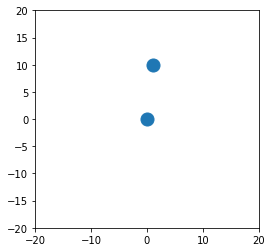

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpo27v8rc7.gif


In [180]:
import matplotlib.pyplot as plt
import numpy as np

import time

from matplotlib import animation
from IPython.display import HTML
import tempfile; tempfile.tempdir='./'


#addapted from the animation function for the ideal gass for NS162
def animate(poslist_frames, Ratom_anim = 0.003, lims=(-10,10)):
    poslist_frames = np.array(poslist_frames)

    # Generate animation
    width = 4 # width of plot in inches

    # set-up figure and ax
    fig, ax = plt.subplots(figsize=(width,width))
    ax.set_xlim((lims[0], lims[1]))
    ax.set_ylim((lims[0], lims[1]))

    # convert atom size to figure units
    t = ax.transAxes.transform([(0,0), (Ratom_anim,Ratom_anim)])
    Ratom_pts = (t[1,1]-t[0,0]) * 72/fig.dpi
    s_circ = (Ratom_pts * 2)**2

    def init_model():
        ax.set_xlim((lims[0], lims[1]))
        ax.set_ylim((lims[0], lims[1]))
        simgraph = ax.scatter([], [])
        return (simgraph,)

    def animate_model(i):
        ax.clear()
        ax.set_xlim((lims[0], lims[1]))
        ax.set_ylim((lims[0], lims[1]))
        simgraph = ax.scatter(poslist_frames[i][:,0], poslist_frames[i][:,1], s=s_circ)
        return (simgraph,)

    print("here is first frame, when ready may need to click 'fetch additional output' to watch movie:")
    animate_model(1)
    plt.show()

    # run to generate the html5 video of the positions
    # (takes about 30s for 100 frames)
    # click 'Fetch additional output to see'
    anim = animation.FuncAnimation(fig, animate_model, init_func=init_model,
                                  frames=len(poslist_frames), interval=40)
    
    
    fname = tempfile.mktemp('.gif')
    print(fname)
    anim.save(fname)
    time.sleep(0.1) # make sure file is saved
    return display(HTML("""
                <image style="width:200" src="{}" >
                """.format(fname)))


Ratom = 0.03 # meters -- grossly exagerated
L = 1 # meters


simu = sim([Particle(200,0,0), Particle(10,0,10,10,0)])
dt = 0.1
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate(p, Ratom_anim=Ratom, lims=(-20,20))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


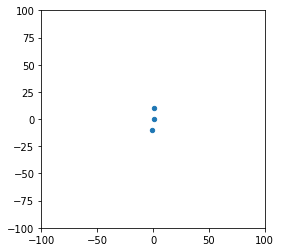

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpux0d1eql.gif


In [181]:
simu = sim([Particle(200,0,-10,-10,0), Particle(100,0,10,10,0), Particle(10,0,0,10,0)])
dt = 0.1
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate(p, Ratom_anim=0.01, lims=(-100,100))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


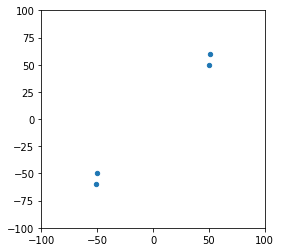

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmp2brryfeo.gif


In [182]:
simu = sim([Particle(200,50,50), Particle(10,50,60,10,0),Particle(200,-50,-50), Particle(10,-50,-60,-10,0)])
dt = 0.1
for _ in range(1000):
    simu.update_system(dt)

p = simu.posList

animate(p, Ratom_anim=0.01, lims=(-100,100))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


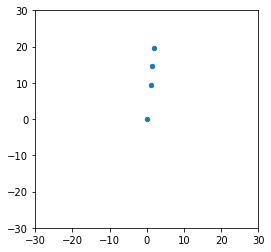

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpse7kp8i2.gif


In [183]:
simu = sim([Particle(1000,0,0), Particle(10,0,10,10,0), Particle(10,0,15,15,0), Particle(10,0,20,20,0)])
dt = 0.1
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate(p, Ratom_anim=0.01, lims=(-30,30))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


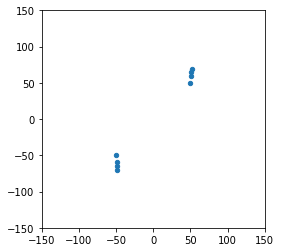

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpg4ol187_.gif


In [184]:
simu = sim([Particle(1000,50,50), Particle(10,50,60,10,0), Particle(10,50,65,15,0), Particle(10,50,70,20,0), Particle(1000,-50,-50), Particle(10,-50,-60,10,0), Particle(10,-50,-65,15,0), Particle(10,-50,-70,20,0)])
dt = 0.1
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate(p, Ratom_anim=0.01, lims=(-150,150))

In [185]:
class Particle3D:
    #same as last function but now in 3d
    def __init__(self, mass, posx, posy, posz, vx=0, vy=0, vz=0):
        self.m = mass
        self.x = posx
        self.y = posy
        self.z = posz

        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.ax = 0
        self.ay = 0
        self.az = 0


class sim3D:
    #same as last sim, but addapted the formulas to 3d
    def __init__(self, particles, G=6.67408e-1):
        self.state = particles
        self.G = G
        self.posList = [[[i.x, i.y, i.z] for i in particles]]

    def update_a(self):
        for particle in self.state:
            ax = 0
            ay = 0
            az = 0
            for neighbor in self.state:
                if particle != neighbor:
                    dx = neighbor.x - particle.x
                    dy = neighbor.y - particle.y
                    dz = neighbor.z - particle.z
                    d = (dx**2 + dy**2 + dz**2)**(1/2)

                    f = self.G*neighbor.m/(d**3)

                    ax += f*dx
                    ay += f*dy
                    az += f*dz
                    
            particle.ax = ax
            particle.ay = ay
            particle.az = az
    
    def update_v(self, dt):
        for particle in self.state:
            particle.vx += dt*particle.ax
            particle.vy += dt*particle.ay
            particle.vz += dt*particle.az

    def update_pos(self, dt):
        for particle in self.state:
            particle.x += dt*particle.vx
            particle.y += dt*particle.vy
            particle.z += dt*particle.vz

    def update_system(self, dt):
        self.update_a()
        self.update_v(dt)
        self.update_pos(dt)
        self.posList.append([[i.x, i.y, i.z] for i in self.state])

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


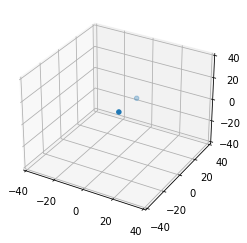

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpap4xakda.gif


In [186]:
def animate3D(poslist_frames, lims=(-10,10)):
    poslist_frames = np.array(poslist_frames)

    fig = plt.figure()

    # set-up figure and ax
    ax = fig.add_subplot(1,1,1, projection='3d')

    ax.set_xlim((lims[0], lims[1]))
    ax.set_ylim((lims[0], lims[1]))
    ax.set_zlim((lims[0], lims[1]))

    def init_model():
        ax.set_xlim((lims[0], lims[1]))
        ax.set_ylim((lims[0], lims[1]))
        ax.set_zlim((lims[0], lims[1]))
        simgraph = ax.scatter([], [], [])
        return (simgraph,)

    def animate_model(i):
        ax.clear()
        ax.set_xlim((lims[0], lims[1]))
        ax.set_ylim((lims[0], lims[1]))
        ax.set_zlim((lims[0], lims[1]))
        simgraph = ax.scatter(poslist_frames[i][:,0], poslist_frames[i][:,1], poslist_frames[i][:,2])
        return (simgraph,)

    print("here is first frame, when ready may need to click 'fetch additional output' to watch movie:")
    animate_model(1)
    plt.show()

    # run to generate the html5 video of the positions
    # (takes about 30s for 100 frames)
    # click 'Fetch additional output to see'
    anim = animation.FuncAnimation(fig, animate_model, init_func=init_model,
                                  frames=len(poslist_frames), interval=40)
    
    
    fname = tempfile.mktemp('.gif')
    print(fname)
    anim.save(fname)
    time.sleep(0.1) # make sure file is saved
    return display(HTML("""
                <image style="width:200" src="{}" >
                """.format(fname)))

L = 1 # meters


simu = sim3D([Particle3D(5000,0,0,0), Particle3D(10,0,20,0,10,0,0)])
dt = 0.1
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-40,40))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


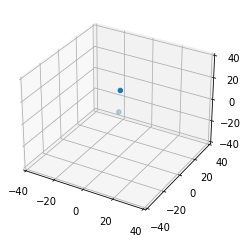

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpkshqq3w9.gif


In [187]:
simu = sim3D([Particle3D(5000,0,0,0), Particle3D(10,0,0,20,10,0,0)])
dt = 0.1
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-40,40))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


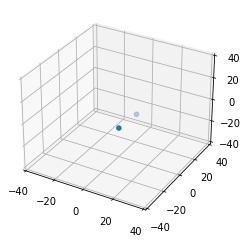

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpvioyius_.gif


In [188]:
simu = sim3D([Particle3D(5000,0,0,-15, vz=2), Particle3D(10,0,20,-15,10,0,0)])
dt = 0.1
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-40,40))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


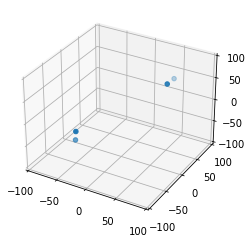

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpijvh549y.gif


In [189]:
simu = sim3D([Particle3D(5000,50,50,50), Particle3D(10,50,70,50,10,0,0), Particle3D(5000,-50,-50,-50), Particle3D(10,-50,-50,-30,10,0,0)])
dt = 0.1
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-100,100))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


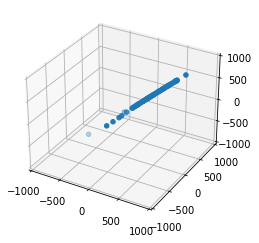

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpqc8b6vvf.gif


In [190]:
def generateGalaxy(n_stars, sing_m, r_max, init_Pos=[0,0,0], init_v=[0,0,0], plane=[1,0,0], up=[0,0,1]):
    #creates a new spiral galaxy around a super-massive black hole

    #creates the singularity at the center of the galaxy
    galaxy = [Particle3D(sing_m, init_Pos[0], init_Pos[1], init_Pos[2], init_v[0], init_v[1], init_v[2])]

    #gravitational constant adjusted for scale (python didnt like the original one)
    G=6.67408e-1

    #normalizes a vector in the direction of where the stars will be created
    plane = np.array(plane)
    n_plane = plane/(np.sqrt(np.sum(plane**2)))

    #gets a perpendicular vector to the stars vector and the up-direction of the galaxy plane for the orbital velocity
    travel_vec = np.cross(n_plane, up)
    travel_vec = travel_vec/(np.sqrt(np.sum(travel_vec**2)))

    for _ in range(n_stars):
        #creates n stars uniformily distributed on a radius from the center
        r = np.random.random()*r_max

        relative_pos = [r*i for i in n_plane]

        #calculates the module of the orbital velocity
        v = (G * sing_m / r)**(1/2) 

        #random mass 1000000x smaller than the black whole
        mass = np.random.normal(loc=sing_m/1000000,scale=sing_m/5000000)

        galaxy.append(Particle3D(mass, 
                        relative_pos[0]+init_Pos[0], relative_pos[1]+init_Pos[1], relative_pos[2]+init_Pos[2],
                        v*travel_vec[0], v*travel_vec[1], v*travel_vec[2]))

    return galaxy
     

        
simu = sim3D(generateGalaxy(100, 10000000, 1000, plane=[1,1,1], up=[-1,-1,1]))
dt = 0.1
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-1000,1000))

In [191]:
class sim3D_simple:
    #same as the other simulation, but now it only considers the attractive force of the singularities

    def __init__(self, sings, particles, G=6.67408e-1):
        self.state = particles
        self.sings = sings
        self.G = G
        self.posList = [[[i.x, i.y, i.z] for i in sings+particles]]

    def update_a(self):
        for particle in self.state:
            ax = 0
            ay = 0
            az = 0
            for sing in self.sings:
                dx = sing.x - particle.x
                dy = sing.y - particle.y
                dz = sing.z - particle.z
                d = (dx**2 + dy**2 + dz**2)**(1/2)

                f = self.G*sing.m/(d**3)

                ax += f*dx
                ay += f*dy
                az += f*dz
                    
            particle.ax = ax
            particle.ay = ay
            particle.az = az

        for particle in self.sings:
            ax = 0
            ay = 0
            az = 0
            for sing in self.sings:
                if particle != sing:
                    dx = sing.x - particle.x
                    dy = sing.y - particle.y
                    dz = sing.z - particle.z
                    d = (dx**2 + dy**2 + dz**2)**(1/2)

                    f = self.G*sing.m/(d**3)

                    ax += f*dx
                    ay += f*dy
                    az += f*dz
                    
            particle.ax = ax
            particle.ay = ay
            particle.az = az

    
    def update_v(self, dt):
        for particle in self.state:
            particle.vx += dt*particle.ax
            particle.vy += dt*particle.ay
            particle.vz += dt*particle.az

        for particle in self.sings:
            particle.vx += dt*particle.ax
            particle.vy += dt*particle.ay
            particle.vz += dt*particle.az

    def update_pos(self, dt):
        for particle in self.state:
            particle.x += dt*particle.vx
            particle.y += dt*particle.vy
            particle.z += dt*particle.vz

        for particle in self.sings:
            particle.x += dt*particle.vx
            particle.y += dt*particle.vy
            particle.z += dt*particle.vz


    def update_system(self, dt):
        self.update_a()
        self.update_v(dt)
        self.update_pos(dt)
        self.posList.append([[i.x, i.y, i.z] for i in self.sings+self.state])

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


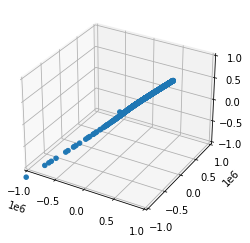

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpyix79mge.gif


In [192]:
gal = generateGalaxy(1000, 10000000, 1000000, plane=[1,1,1], up=[-1,-1,1])

simu = sim3D_simple([gal[0]], gal[1:])
dt = 10000
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-1000000,1000000))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


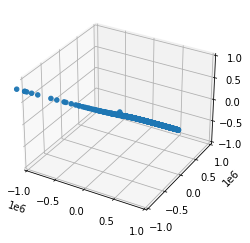

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpx5h20f2u.gif


In [193]:
gal = generateGalaxy(1000, 10000000, 1000000, plane=[1,0,0])

simu = sim3D_simple([gal[0]], gal[1:])
dt = 10000
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-1000000,1000000))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


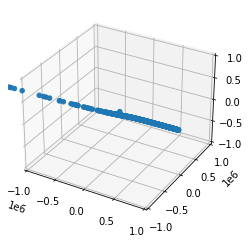

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpc7sk1p6i.gif


In [194]:
gal = generateGalaxy(1000, 10000000, 1000000, plane=[1,0,0], init_v=[0,0,1])

simu = sim3D_simple([gal[0]], gal[1:])
dt = 10000
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-1000000,1000000))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


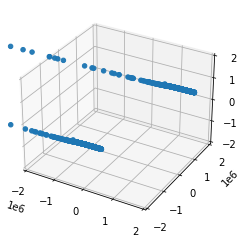

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpysvy1pjx.gif


In [195]:
gal1 = generateGalaxy(1000, 10000000, 1000000, plane=[1,0,0], init_Pos=[-1000000, -1000000, -1000000])

gal2 = generateGalaxy(1000, 10000000, 1000000, plane=[1,0,0], init_Pos=[1000000, 1000000, 1000000])

simu = sim3D_simple([gal1[0], gal2[0]], gal1[1:]+gal2[1:])
dt = 10000
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-2000000,2000000))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


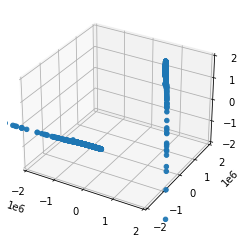

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmp65plebwa.gif


In [196]:
gal1 = generateGalaxy(1000, 10000000, 1000000, plane=[1,0,0], init_Pos=[-1000000, -1000000, -1000000])

gal2 = generateGalaxy(1000, 10000000, 1000000, plane=[0,0,1], up=[1,0,0], init_Pos=[1000000, 1000000, 1000000])

simu = sim3D_simple([gal1[0], gal2[0]], gal1[1:]+gal2[1:])
dt = 10000
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-2000000,2000000))

here is first frame, when ready may need to click 'fetch additional output' to watch movie:


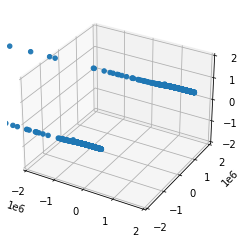

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmpwwjh_yai.gif


In [197]:
gal1 = generateGalaxy(1000, 10000000, 1000000, plane=[1,0,0], init_Pos=[-1000000, -1000000, -1000000], init_v=[0.5,0,0.5])

gal2 = generateGalaxy(1000, 10000000, 1000000, plane=[1,0,0], init_Pos=[1000000, 1000000, 1000000], init_v=[-0.5,0,-0.5])

simu = sim3D_simple([gal1[0], gal2[0]], gal1[1:]+gal2[1:])
dt = 10000
for _ in range(2000):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-2000000,2000000))

In [198]:
class sim3D_cg:
    #similar, but now coarse-graining the variables of the system and only taking the ratio of stars in the limits

    def __init__(self, sings, particles, lim, G=6.67408e-1):
        self.state = particles
        self.sings = sings
        self.G = G
        self.ds = [1]
        self.tot_m = sum([i.m for i in self.state + self.sings])
        self.lim = lim

    def update_a(self):
        for particle in self.state:
            ax = 0
            ay = 0
            az = 0
            for sing in self.sings:
                dx = sing.x - particle.x
                dy = sing.y - particle.y
                dz = sing.z - particle.z
                d = (dx**2 + dy**2 + dz**2)**(1/2)

                f = self.G*sing.m/(d**3)

                ax += f*dx
                ay += f*dy
                az += f*dz
                    
            particle.ax = ax
            particle.ay = ay
            particle.az = az

        for particle in self.sings:
            ax = 0
            ay = 0
            az = 0
            for sing in self.sings:
                if particle != sing:
                    dx = sing.x - particle.x
                    dy = sing.y - particle.y
                    dz = sing.z - particle.z
                    d = (dx**2 + dy**2 + dz**2)**(1/2)

                    f = self.G*sing.m/(d**3)

                    ax += f*dx
                    ay += f*dy
                    az += f*dz
                    
            particle.ax = ax
            particle.ay = ay
            particle.az = az

    
    def update_v(self, dt):
        for particle in self.state:
            particle.vx += dt*particle.ax
            particle.vy += dt*particle.ay
            particle.vz += dt*particle.az

        for particle in self.sings:
            particle.vx += dt*particle.ax
            particle.vy += dt*particle.ay
            particle.vz += dt*particle.az

    def update_pos(self, dt):
        d=0

        for particle in self.state:
            particle.x += dt*particle.vx
            particle.y += dt*particle.vy
            particle.z += dt*particle.vz

            if particle.x <= self.lim[1] and particle.x >= self.lim[0] and particle.y <= self.lim[1] and particle.y >= self.lim[0] and particle.z <= self.lim[1] and particle.z >= self.lim[0]:
                d+=particle.m

        for particle in self.sings:
            particle.x += dt*particle.vx
            particle.y += dt*particle.vy
            particle.z += dt*particle.vz
            
            if particle.x <= self.lim[1] and particle.x >= self.lim[0] and particle.y <= self.lim[1] and particle.y >= self.lim[0] and particle.z <= self.lim[1] and particle.z >= self.lim[0]:
                d+=particle.m

        self.ds.append(d/self.tot_m)

    def update_system(self, dt):
        self.update_a()
        self.update_v(dt)
        self.update_pos(dt)


dens = []
r = 1000000

for _ in range(100):

    gal1 = generateGalaxy(n_stars=int(np.random.normal(1000,100)), 
                        sing_m=10000000 + np.random.normal(0,100000), 
                        r_max=r, 
                        init_Pos=[np.random.normal(0,r/3), np.random.normal(0,r/3), np.random.normal(0,r/3)], 
                        init_v=[np.random.normal(0,0.2),np.random.normal(0,0.2),np.random.normal(0,0.2)])

    gal2 = generateGalaxy(n_stars=int(np.random.normal(1000,100)), 
                        sing_m=10000000 + np.random.normal(0,100000), 
                        r_max=r, 
                        init_Pos=[np.random.normal(0,r/3), np.random.normal(0,r/3), np.random.normal(0,r/3)], 
                        init_v=[np.random.normal(0,0.2),np.random.normal(0,0.2),np.random.normal(0,0.2)])


    simu = sim3D_cg([gal1[0], gal2[0]], gal1[1:]+gal2[1:], lim=(-2000000,2000000))
    dt = 10000
    for _ in range(500):
        simu.update_system(dt)

    dens.append(simu.ds)
    

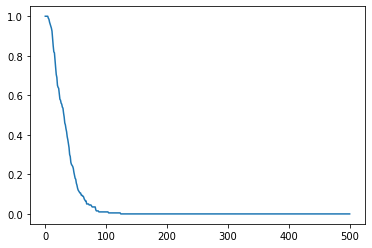

In [199]:
plt.plot(range(501), np.mean(dens, axis=0))

In [202]:
dens = []
r = 1000000

for _ in range(100):

    gal1 = generateGalaxy(n_stars=int(np.random.normal(1000,100)), 
                        sing_m=10000000 + np.random.normal(0,100000), 
                        r_max=r)

    simu = sim3D_cg([gal1[0]], gal1[1:], lim=(-1500000,1500000))
    dt = 10000
    for _ in range(500):
        simu.update_system(dt)

    dens.append(simu.ds)

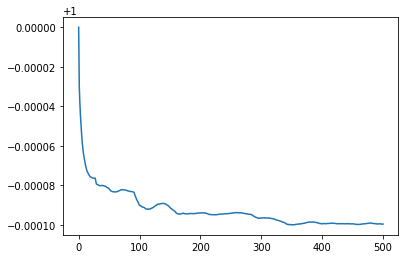

In [203]:
plt.plot(range(501), np.mean(dens, axis=0))

In [204]:
"""

def generateGalaxy(n_stars=1000, r_max=1e21, init_Pos=[0,0,0], init_v=[0,0,0], plane=[1,0,0], up=[0,0,1], avg_star_mass=6e30):
    sing_m = avg_star_mass*1e7

    galaxy = [Particle3D(sing_m, init_Pos[0], init_Pos[1], init_Pos[2], init_v[0], init_v[1], init_v[2])]

    G=6.67408e-11

    plane = np.array(plane)
    n_plane = plane/(np.sqrt(np.sum(plane**2)))

    travel_vec = np.cross(n_plane, up)
    
    travel_vec = travel_vec/(np.sqrt(np.sum(travel_vec**2)))

    for _ in range(n_stars):
        r = np.random.normal(0, r_max/10)

        relative_pos = [r*i for i in n_plane]

        v = (G * sing_m / r)**(1/2) 

        mass = np.random.normal(loc=avg_star_mass,scale=avg_star_mass/3)

        if r<0:
            galaxy.append(Particle3D(mass, 
                            relative_pos[0]+init_Pos[0], relative_pos[1]+init_Pos[1], relative_pos[2]+init_Pos[2],
                            v*travel_vec[0]*(-1), v*travel_vec[1]*(-1), v*travel_vec[2]*(-1)))

        else:
            galaxy.append(Particle3D(mass, 
                            relative_pos[0]+init_Pos[0], relative_pos[1]+init_Pos[1], relative_pos[2]+init_Pos[2],
                            v*travel_vec[0], v*travel_vec[1], v*travel_vec[2]))


    return galaxy


gal = generateGalaxy()

simu = sim3D_simple([gal[0]], gal[1:])
dt = 1e10
for _ in range(500):
    simu.update_system(dt)

p = simu.posList

animate3D(p, lims=(-1e21,1e21))
"""

'\n\ndef generateGalaxy(n_stars=1000, r_max=1e21, init_Pos=[0,0,0], init_v=[0,0,0], plane=[1,0,0], up=[0,0,1], avg_star_mass=6e30):\n    sing_m = avg_star_mass*1e7\n\n    galaxy = [Particle3D(sing_m, init_Pos[0], init_Pos[1], init_Pos[2], init_v[0], init_v[1], init_v[2])]\n\n    G=6.67408e-11\n\n    plane = np.array(plane)\n    n_plane = plane/(np.sqrt(np.sum(plane**2)))\n\n    travel_vec = np.cross(n_plane, up)\n    \n    travel_vec = travel_vec/(np.sqrt(np.sum(travel_vec**2)))\n\n    for _ in range(n_stars):\n        r = np.random.normal(0, r_max/10)\n\n        relative_pos = [r*i for i in n_plane]\n\n        v = (G * sing_m / r)**(1/2) \n\n        mass = np.random.normal(loc=avg_star_mass,scale=avg_star_mass/3)\n\n        if r<0:\n            galaxy.append(Particle3D(mass, \n                            relative_pos[0]+init_Pos[0], relative_pos[1]+init_Pos[1], relative_pos[2]+init_Pos[2],\n                            v*travel_vec[0]*(-1), v*travel_vec[1]*(-1), v*travel_vec[2]*(-1)))\